In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as plt 
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('50_Startups.csv.xls')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [21]:
#drop unnecessary column
df.drop(columns=['State'], axis=1, inplace=True)
df.drop(columns=['Administration'], axis=1, inplace=True)




In [23]:
df.isnull().sum()

R&D Spend          0
Marketing Spend    0
Profit             0
dtype: int64

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


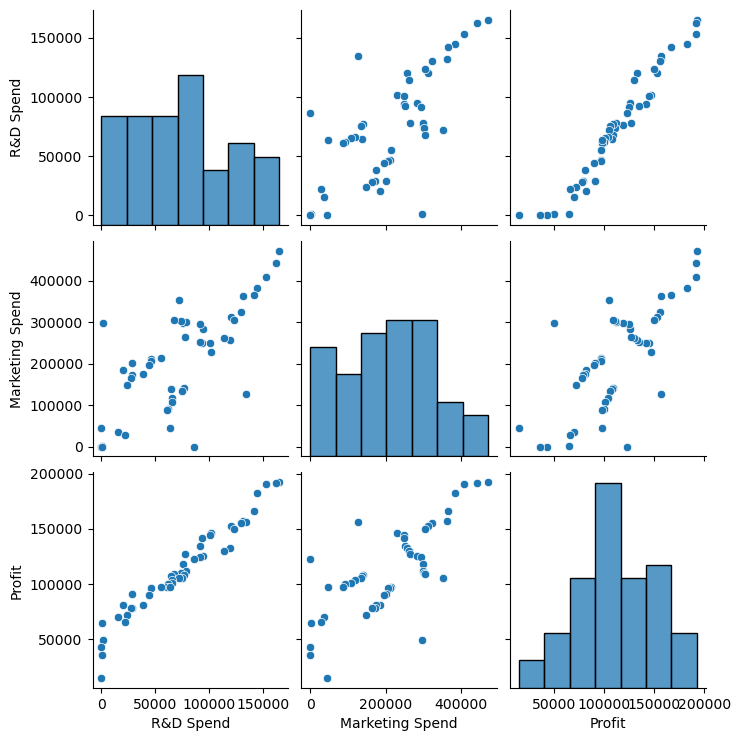

In [25]:
sns.pairplot(df)

In [27]:
df.corr()

,R&D Spend,Marketing Spend,Profit
R&D Spend,1.000000,0.724248,0.972900
Marketing Spend,0.724248,1.000000,0.747766
Profit,0.972900,0.747766,1.000000


Text(0, 0.5, 'Marketing Spend')

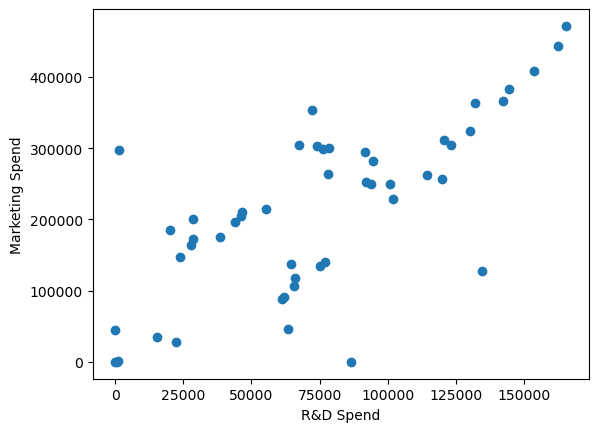

In [29]:
#visulation
plt.scatter(df['R&D Spend'],df['Marketing Spend'])
plt.xlabel("R&D Spend")
plt.ylabel("Marketing Spend")

In [43]:
#independent and dependent 
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]


In [45]:
X.head()

,R&D Spend,Marketing Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42


In [47]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [49]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.25,random_state=42)

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

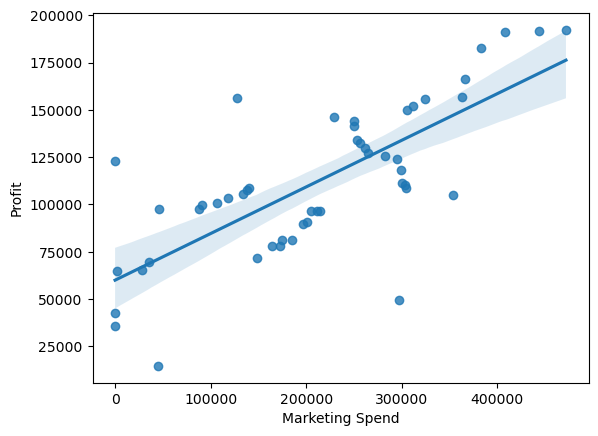

In [51]:
# sns.regplot(df['Marketing Spend'],df['Profit'])
sns.regplot(x='Marketing Spend', y='Profit', data=df)

<Axes: xlabel='Marketing Spend', ylabel='R&D Spend'>

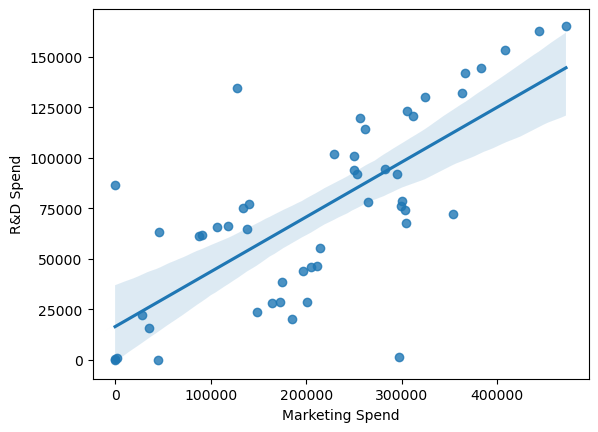

In [53]:
sns.regplot(x='Marketing Spend', y='R&D Spend', data=df)

<Axes: xlabel='Profit', ylabel='R&D Spend'>

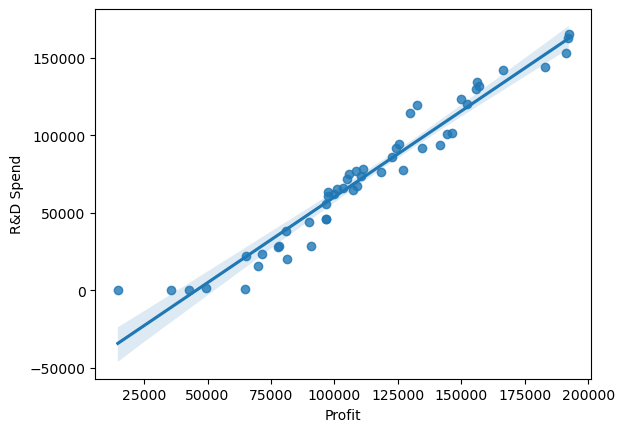

In [57]:
sns.regplot(x='Profit', y='R&D Spend', data=df)

In [59]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [63]:
X_train

array([[ 0.92677074,  0.68026002],
       [ 1.42728466,  1.29883063],
       [ 1.2223534 , -0.90877173],
       [-1.01920612, -0.59118489],
       [-1.57742895,  0.55497702],
       [-1.60505838, -2.01236051],
       [ 0.80035185,  0.24962277],
       [ 0.9854204 ,  0.6229564 ],
       [ 0.03349923,  0.27182842],
       [ 0.01314463, -0.79766707],
       [-0.62994291, -0.19087808],
       [-0.32097317, -1.25007525],
       [ 1.86787316,  2.06428062],
       [-1.13924558, -1.76752292],
       [-0.09053785,  1.03946689],
       [-0.43948461, -0.15772172],
       [ 1.16483373,  1.12308967],
       [-0.22710589, -1.08658805],
       [ 0.50941708,  0.14565818],
       [-1.00301569, -0.27444296],
       [ 1.8100817 ,  1.82332408],
       [ 0.04140416,  0.57764064],
       [ 1.61776858,  1.5125627 ],
       [-1.27938194, -1.70531316],
       [-0.63859745, -0.23650231],
       [-0.18663087,  0.62111683],
       [-1.00111339, -0.51924971],
       [ 0.53548509, -0.03220274],
       [-0.05090486,

In [65]:
from sklearn.linear_model import LinearRegression

In [67]:
model = LinearRegression()  # Supports multi-output by default
model.fit(X_train, Y_train)  # Y_train should have shape (n_samples, 3)
Y_pred = model.predict(X_test)  # Y_pred will have shape (13, 3)




In [87]:
#cross validation
from sklearn.model_selection import cross_val_score

validation_score=cross_val_score(model,X_train,Y_train,scoring= 'neg_mean_squared_error',cv=3)

In [73]:
np.mean(validation_score)

-95886320.60916793

In [77]:
#preditions
Y_pred=model.predict(X_test)


In [79]:
print(Y_test.shape)  # Check shape of true labels
print(Y_pred.shape)  # Check shape of predicted values


(13,)
(13,)


In [83]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
score = r2_score(Y_test,Y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
print(score)




214688574.60170147
11990.85604850162
14652.254932320195
0.8002454183096026


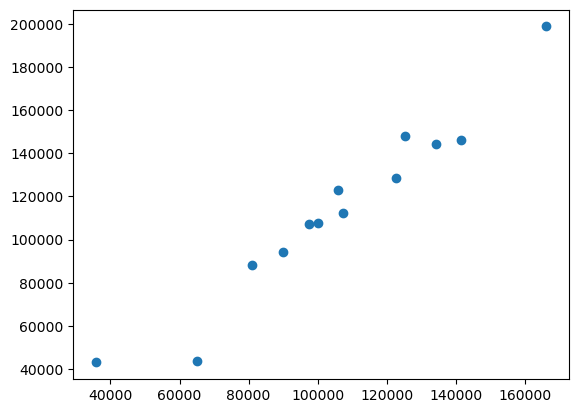

In [93]:
plt.scatter(Y_test,Y_pred)


In [95]:
residuals =Y_test-Y_pred
print(residuals)

13    -9985.793400
39    -7028.267552
30    -7965.206631
45    21265.855126
17   -22789.548012
48    -7453.955596
26   -17167.954679
25    -5060.315930
32   -10044.477640
19    -5681.648001
12    -4451.921053
4    -32527.089256
37    -4459.095755
Name: Profit, dtype: float64


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


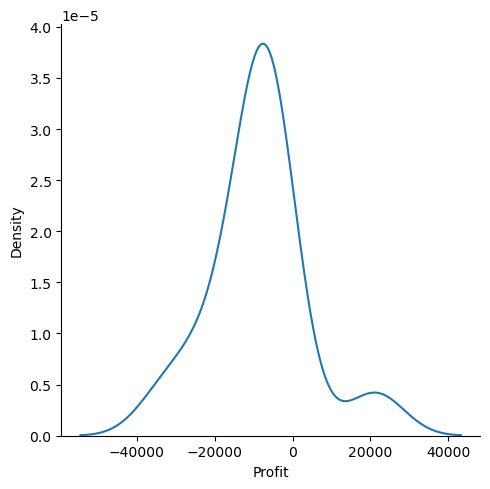

In [97]:
sns.displot(residuals,kind='kde')

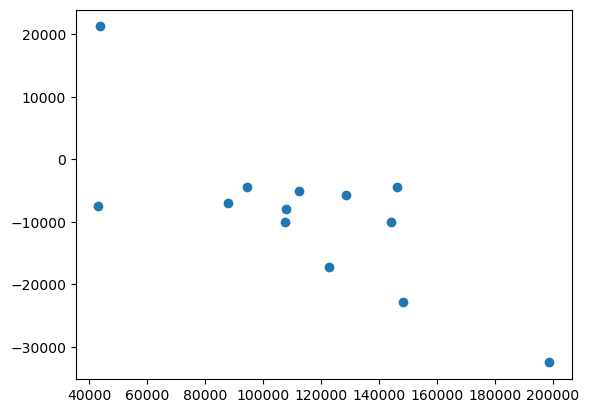

In [101]:
plt.scatter(Y_pred,residuals)

In [109]:
print (model.coef_)

[37318.87642488  4649.91771642]


In [111]:
#ols
import statsmodels.api as sm

In [113]:
model1 = sm.OLS(Y_train,X_train).fit()

In [117]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.113
Model:                            OLS   Adj. R-squared (uncentered):              0.062
Method:                 Least Squares   F-statistic:                              2.223
Date:                Thu, 03 Oct 2024   Prob (F-statistic):                       0.123
Time:                        10:36:02   Log-Likelihood:                         -483.54
No. Observations:                  37   AIC:                                      971.1
Df Residuals:                      35   BIC:                                      974.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.732e+04   2.86e+04      1.303      0.201   -2.08e+04    9.54e+04
x2          4649.9177   2.86e+04      0.162      0.872   -5.35e+04    6.28e+04
==============================================================================
Omnibus:                       13.268   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.266
Skew:                          -1.085   Prob(JB):                     0.000484
Kurtosis:                       5.278   Cond. No.                         2.57
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""